Interfunctionnal robustness metabolic network of C. elegans

We downloaded the dataset from https://kateto.net/2016/05/network-datasets/

Robustness in metabolic network is a hot topic as it helps understand major biological pathways. Some methods exist to evaluate but are computationnaly expensive [1] and does not take into account the functionnal properties of nodes. Here we use simple method to evaluate robustness after establishing potential functionnal role by community detection. We see interfunction robustness as the number of mutation needed to stop interaction between two distinct functions. 

We model two types of mutation, either non-sens mutation that kills a node, or missense mutation that kills an edge [2].

In [33]:
import community
%matplotlib inline

We import libraries and the dataset downloaded https://kateto.net/2016/05/network-datasets/

In [34]:
import networkx as nx
import sys
sys.path.append('/usr/local/lib/python3.5/dist-packages/')
import pandas as pd
import seaborn as sns
import collections
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms.community import modularity
from networkx.algorithms.community import modularity_max

#dts = pd.read_csv("/home/nathan/Bureau/ENS/M2/Complex Network/arenas-meta/out.arenas-meta")

#print(dts.head())

G = nx.read_edgelist("/home/nathan/Bureau/ENS/M2/Complex Network/arenas-meta/out.arenas-meta", 
                     comments="%", create_using=nx.MultiGraph())

print(G.number_of_edges())
print(G.number_of_nodes())

4596
453


Next we show the graph and the main properties of the graph.

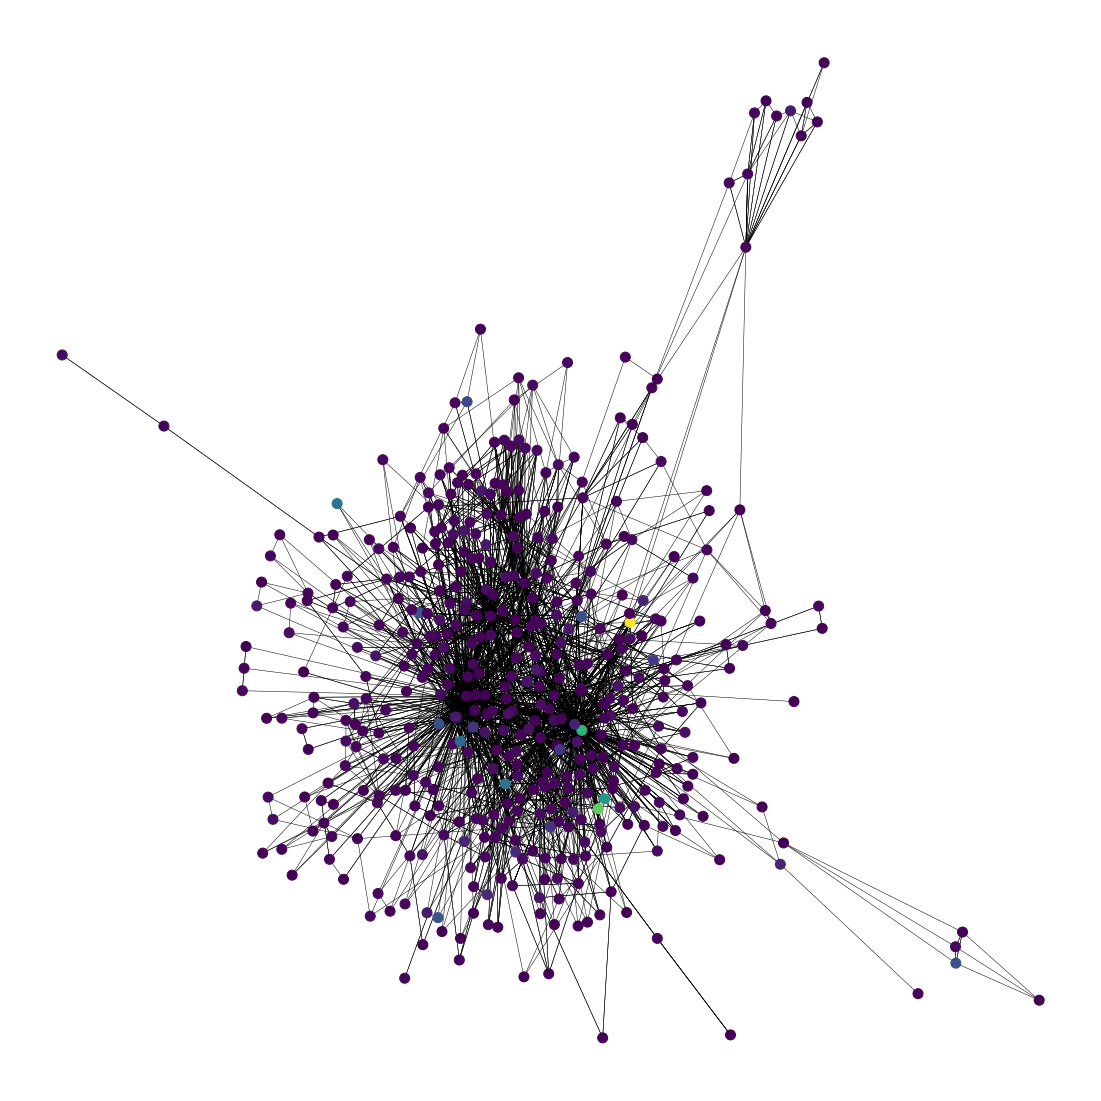

In [35]:
values = list(dict(G.degree()).values())
plt.figure(figsize=(15,15))
nx.draw_spring(G, node_size=100, cmap=plt.get_cmap('viridis'), node_color=values, width=0.5)

plt.show()

In [36]:
graph_properties = pd.DataFrame()
graph_properties["Network"] = ["Metabolic Network"]
graph_properties["m"] = [G.number_of_edges()]
graph_properties["n"] = [G.number_of_nodes()]
graph_properties["density"] = [nx.density(G)]

graph_properties["diam."]=[nx.diameter(G)]
graph_properties["avg. dist"]=[nx.average_shortest_path_length(G)]
graph_properties["# Conn. Comp."]=[nx.number_connected_components(G)]

graph_properties

,Network,m,n,density,diam.,avg. dist,# Conn. Comp.
0,Metabolic Network,4596,453,0.044892,7,2.663785,1


As expected, there is only one connected component, otherwise it would have meant that cells have distinct regulation network. The diameter shows that functions are easily regulating other functions as 7 is small.

We show the distribution of degree in a linear plot, a linear plot with a zoom into small values and a log log plot.

[(1, 2), (2, 4), (3, 49), (4, 18), (5, 13), (6, 71), (7, 8), (8, 35), (9, 23), (10, 37), (11, 2), (12, 53), (13, 3), (14, 17), (15, 13), (16, 11), (17, 2), (18, 9), (19, 4), (20, 7), (21, 5), (22, 9), (23, 2), (25, 1), (26, 6), (27, 3), (28, 2), (29, 2), (30, 2), (32, 2), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (39, 1), (42, 2), (44, 2), (45, 1), (47, 1), (48, 1), (50, 1), (63, 1), (65, 1), (66, 1), (67, 1), (72, 1), (78, 1), (95, 1), (101, 1), (106, 1), (111, 1), (137, 1), (157, 1), (158, 1), (161, 1), (166, 2), (224, 1), (246, 2), (346, 1), (416, 1), (489, 1), (644, 1)]


/home/nathan/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


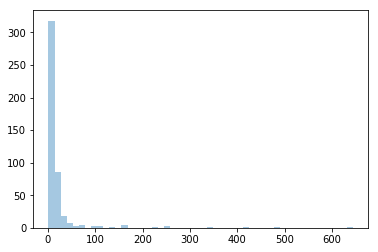

In [37]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
sns.distplot(degree_sequence, kde=False, rug=False)
dist = dict()
for a in degree_sequence:
    dist[a] = 1 if a not in dist.keys() else dist[a] + 1
d = list(zip(dist.keys(), dist.values()))
d.sort(key=lambda x : x[0])
print(d)

/home/nathan/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


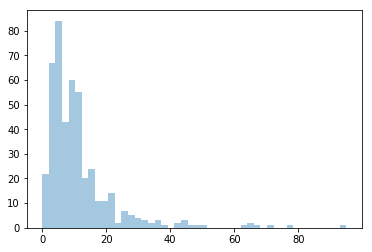

In [38]:
low_degree_sequence = sorted([d if d < 100 else 0 for n, d in G.degree()], reverse=True)
sns.distplot(low_degree_sequence, kde=False, rug=False)

[ 2  4 49  1 13 71  8 35  1 37  2 53  3 17 13 11  2  9  4  7  5  9  2  1
  6  3  2  1  2  1  1  1  1  2  1  2  1  2  2  1  1  1  1  1 23  1  1  1
  1  2  1  1  1  1  1  1  1  1  2  1  2  1 18]


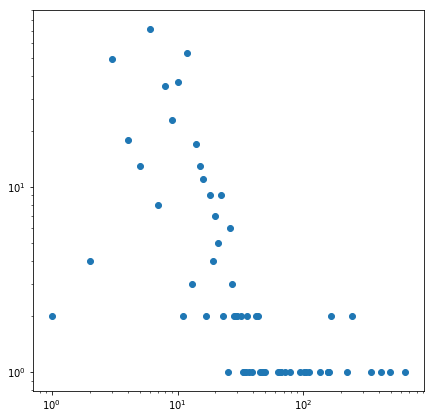

In [39]:
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
deg = np.array(list(deg))
cnt = np.array(list(cnt))
print(cnt)
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
#sns.regplot(deg,cnt,fit_reg=False)
plt.scatter(deg, cnt)

Then we look to find communities to estimate what proteins are involved in the same function.
Then we show the graph with those communities

In [40]:
from collections import Counter
comm = modularity_max.greedy_modularity_communities(G)
print("# of communities : ", len(comm))
print("Modularity : ", modularity_max.modularity(G, comm))
comm2 = community.best_partition(G)
print("# of communities : ", len(Counter(comm2.values())))
print("Modularity : ", community.modularity(comm2, G))
dendrogram = community.generate_dendrogram(G)
comm3 = community.partition_at_level(dendrogram, 0)
print("# of communities : ", len(Counter(comm2.values())))
print("Modularity : ", community.modularity(comm2, G))


# of communities :  21
Modularity :  0.33168221164806516
# of communities :  10
Modularity :  0.10307526088830413
# of communities :  10
Modularity :  0.10307526088830413


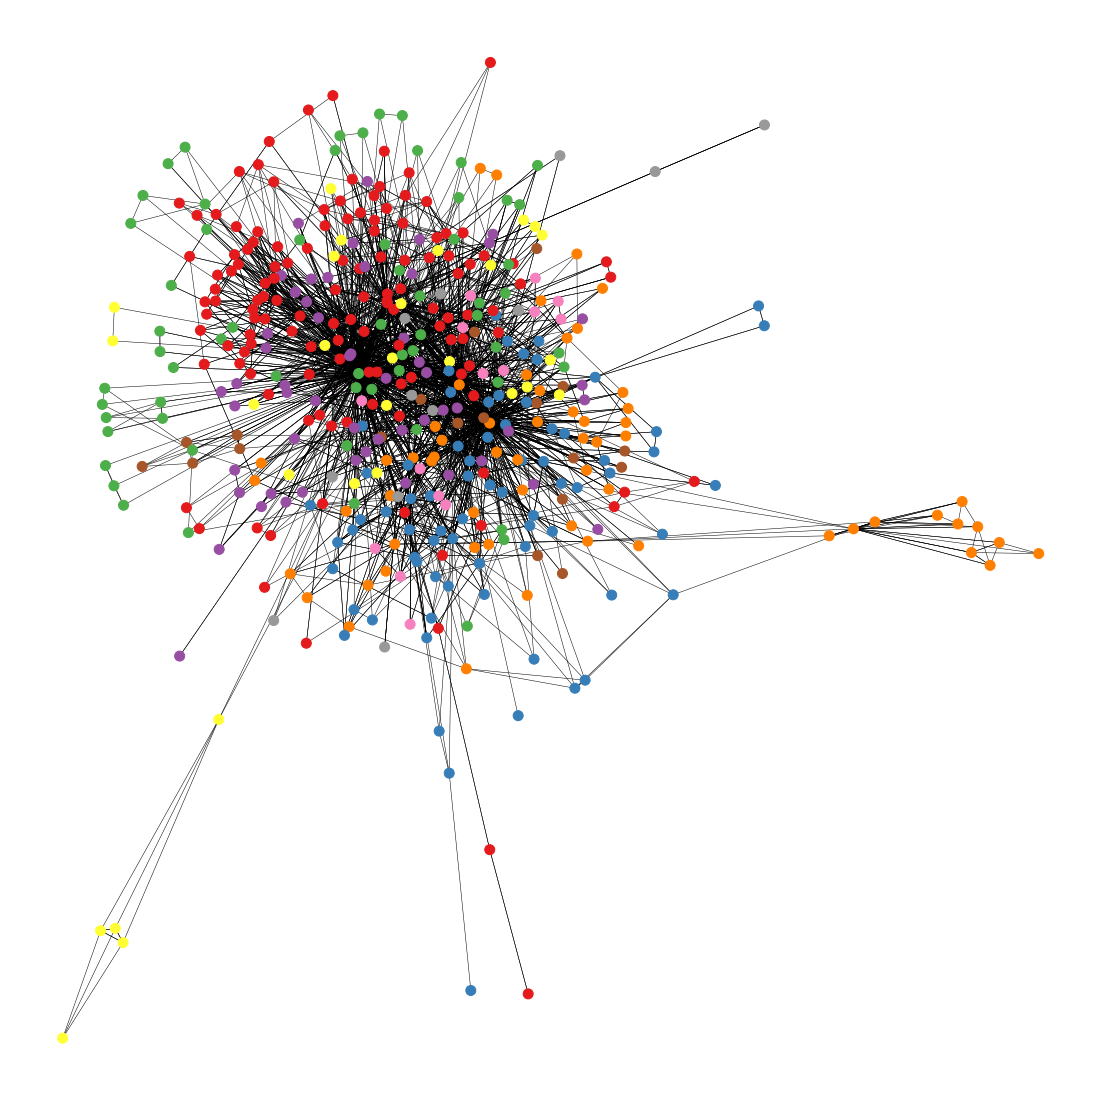

In [41]:
plt.figure(figsize=(15,15))
comm[0]
#colors = ['black'] * 22
col = dict()
for i in range(len(comm)):
    for x in comm[i]:
        col[x] = i

color = map(lambda x : col[x], G.nodes())
nx.draw_spring(G, node_size=100, cmap=plt.cm.Set1, node_color=list(color), width=0.5)

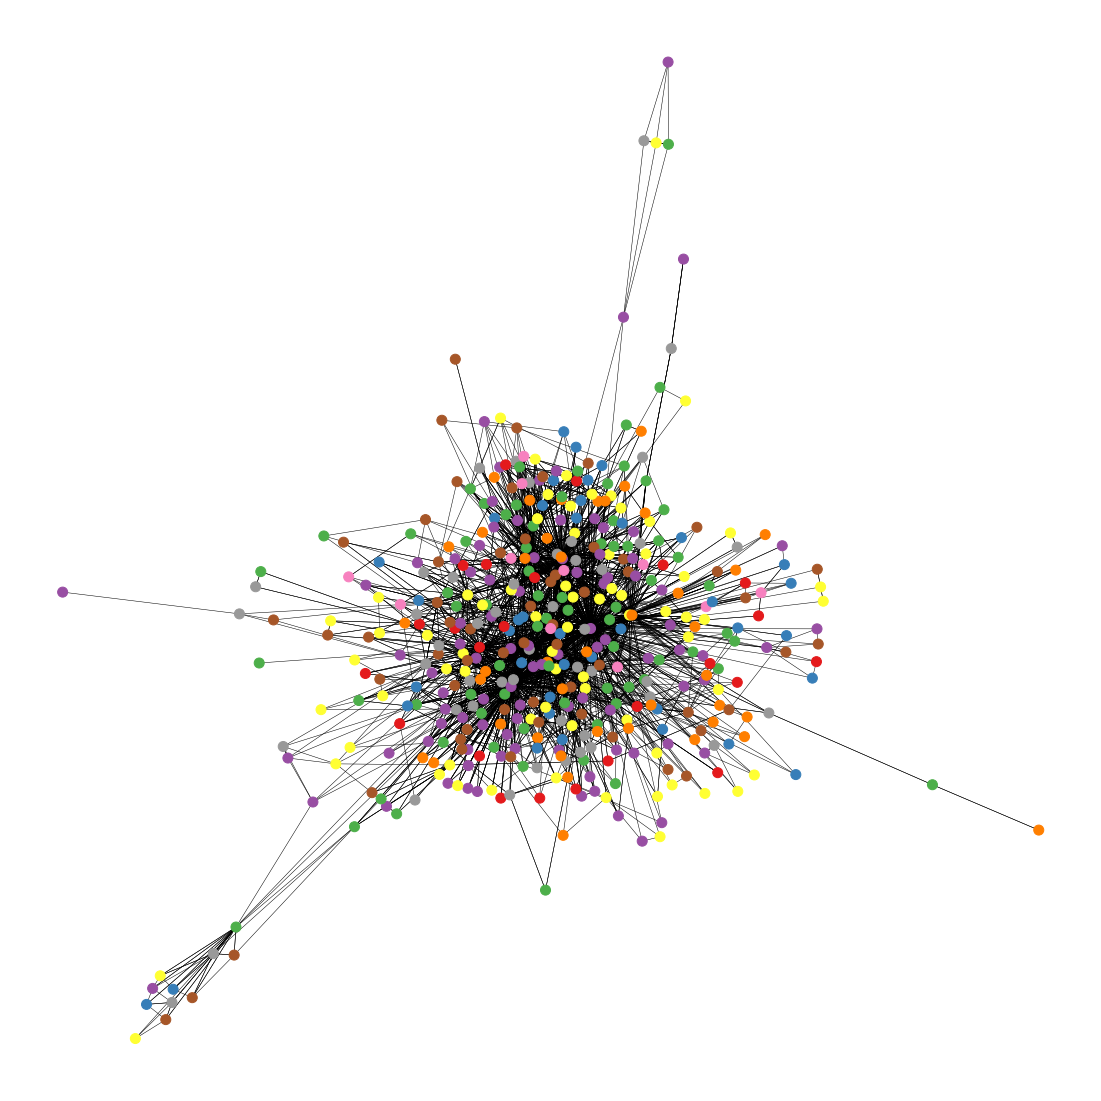

In [42]:
plt.figure(figsize=(15,15))
nx.draw_spring(G, node_size=100, cmap=plt.cm.Set1, node_color=list(comm2.values()), width=0.5)

The number of community 21 is coherent with the different function we can find into other studies [3].
Modularity score of 0.33 is also sufficient.

We abandon the second community detection with only 8-10 communities (variable).

Now we plot some of the community and the community sizes.

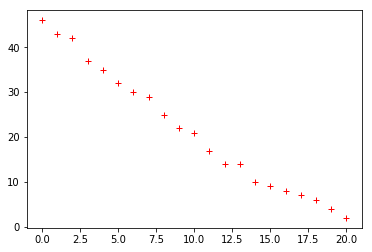

In [43]:
size = []
for i in range(len(comm)):
    size.append(len(comm[i]))
plt.plot(size, 'r+')
plt.show()

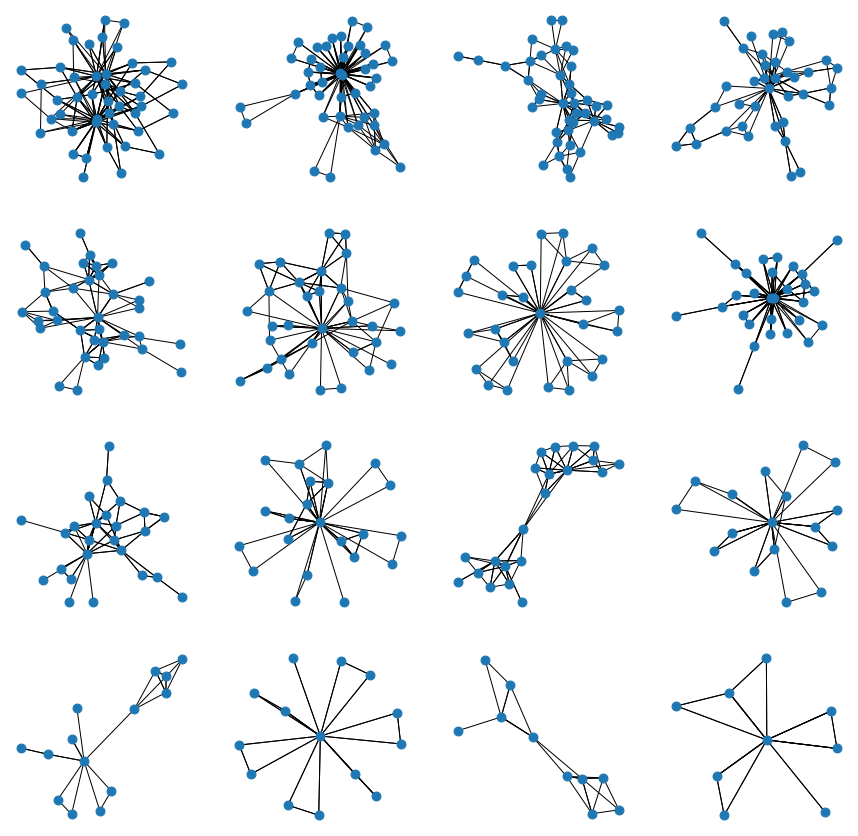

In [44]:
plt.figure(figsize=(15,15))
for i in range(16):
    plt.subplot(4, 4, i+1)
    nx.draw_spring(G.subgraph(comm[i]), node_size=80)
plt.show()

We show some properties of the different communities.

In [45]:
def total_edges(G, comm):
    tot = 0
    group = list(comm)
    for x in G.edges():
        a, b = x
        if a in group or b in group:
            tot += 1
    return tot

subgraph_properties = pd.DataFrame()
subgraph_properties["Network"] = ["Community : " + str(i) for i in range(len(comm))]
subgraph_properties["m"] = [G.subgraph(comm[i]).number_of_edges() for i in range(len(comm))]
subgraph_properties["n"] = [G.subgraph(comm[i]).number_of_nodes() for i in range(len(comm))]
subgraph_properties["density"] = [nx.density(G.subgraph(comm[i])) for i in range(len(comm))]
subgraph_properties["diam."]=[nx.diameter(G.subgraph(comm[i])) for i in range(len(comm))]
subgraph_properties["avg. dist"]=[nx.average_shortest_path_length(G.subgraph(comm[i])) for i in range(len(comm))]
subgraph_properties["# Conn. Comp."]=[nx.number_connected_components(G.subgraph(comm[i])) for i in range(len(comm))]
subgraph_properties["Proportion intra/inter edges"] = [G.subgraph(i).number_of_edges() / total_edges(G, i) \
                                                       for i in comm ]

subgraph_properties


,Network,m,n,density,diam.,avg. dist,# Conn. Comp.,Proportion intra/inter edges
0,Community : 0,268,46,0.258937,4,2.273430,1,0.427432
1,Community : 1,233,43,0.258029,4,2.122924,1,0.419820
2,Community : 2,159,42,0.184669,7,2.958188,1,0.316103
3,Community : 3,123,37,0.184685,5,2.375375,1,0.263948
4,Community : 4,141,35,0.236975,6,2.675630,1,0.349876
5,Community : 5,113,32,0.227823,4,2.139113,1,0.230143
6,Community : 6,82,30,0.188506,2,1.866667,1,0.116976
7,Community : 7,211,29,0.519704,4,2.086207,1,0.352254
8,Community : 8,91,25,0.303333,5,2.436667,1,0.226933
9,Community : 9,65,22,0.281385,2,1.839827,1,0.133470


In [46]:
#Proportion of edges intra community / inter community

print("Total proportion of edges : ", np.sum(subgraph_properties["m"]) / graph_properties["m"][0])

Total proportion of edges :  0.39795474325500435


We want to test the robustness, not into communities because it is high, but inter communities, to do so we use a simple metric, we count minimum number of mutation.
We count mutation that affect only interaction (edges), only protein (nodes).

Number of mutation_interaction is easy to count, it is total_edges - subgraph_edges

Number mutation_node is also easy to count, it is the number of node adjacent to a node out of the graph.

Note that promoter mutation method is not perfect, while we only suppress nodes into the community and not out of the community. (See if we try another method to do so)

In [47]:
def number_out_node(G, comm):
    group = list(comm)
    c = []
    for x in G.edges():
        a, b = x
        if a in group and b not in group: 
            if a not in c:
                c.append(a)
        elif a not in group and b in group:
            if b not in c:
                c.append(b)
    return len(c)

subgraph_properties["Mutation of coding sequence"] = [total_edges(G, i) - G.subgraph(i).number_of_edges() \
                                                     for i in comm]
subgraph_properties["Mutation of promoter"] = [number_out_node(G, i) \
                                                     for i in comm]
subgraph_properties


,Network,m,n,density,diam.,avg. dist,# Conn. Comp.,Proportion intra/inter edges,Mutation of coding sequence,Mutation of promoter
0,Community : 0,268,46,0.258937,4,2.273430,1,0.427432,359,39
1,Community : 1,233,43,0.258029,4,2.122924,1,0.419820,322,38
2,Community : 2,159,42,0.184669,7,2.958188,1,0.316103,344,35
3,Community : 3,123,37,0.184685,5,2.375375,1,0.263948,343,27
4,Community : 4,141,35,0.236975,6,2.675630,1,0.349876,262,30
5,Community : 5,113,32,0.227823,4,2.139113,1,0.230143,378,28
6,Community : 6,82,30,0.188506,2,1.866667,1,0.116976,619,7
7,Community : 7,211,29,0.519704,4,2.086207,1,0.352254,388,26
8,Community : 8,91,25,0.303333,5,2.436667,1,0.226933,310,25
9,Community : 9,65,22,0.281385,2,1.839827,1,0.133470,422,21


We see that a lot of mutation of coding sequence are required to completely avoid interaction between a community and another.
Even a lot promoter mutation and protein suppression ar required. Except for Community 20 but community size is only 2 so it is not really relevent.

We now decide to look for nodes that are the only path between some population and the rest of the population.

We do it the naive way as the network is not too big :

In [48]:
def number_and_size_connected_components(G):
    nb = 0
    s = []
    X = nx.connected_components(G)
    for i in X:
        nb += 1
        s.append(len(i))
    return nb, tuple(s)

list_id, list_nb, list_size = [], [], []
for v in G.nodes():
    A = G.copy()
    A.remove_node(v)
    x, g = number_and_size_connected_components(A)
    if x == 1:
        continue
    list_id.append(v)
    list_nb.append(x)
    list_size.append(g)

mut_promoter = pd.DataFrame()
mut_promoter["Node"] = list_id
mut_promoter["# Conn Comp"] = list_nb
mut_promoter["Sizes"] = list_size

mut_promoter



,Node,# Conn Comp,Sizes
0,56,2,"(450, 2)"
1,355,2,"(451, 1)"
2,38,2,"(451, 1)"
3,127,2,"(450, 2)"
4,15,5,"(438, 5, 2, 4, 3)"
5,103,2,"(451, 1)"
6,357,2,"(451, 1)"
7,359,2,"(450, 2)"
8,281,2,"(451, 1)"
9,381,2,"(448, 4)"


We see that except for node 15, node suppression can separate only 4 nodes from the rest.
There is only 12 nodes that are bridges.
This means if there is a random promoter mutation, there is 12/453 = 2.6% chance it really affects the network. Even in this case, it may not lead to a lethal phenotype.

Reference :
- [1] Ontology-based functional classification of genes: evaluation with reference sets and overlap analysis. 2011, Benabderrahmane
- [2] Homozygous missense and nonsense mutations in BMPR1B cause acromesomelic chondrodysplasia-type Grebe. 2014, Graul-Neumann
- [3] Exact quantification of cellular robustness in genome-scale metabolic networks. 2016, Gerstl